In [2]:
import pandas as pd
import numpy as np
import datetime
from dataclasses import dataclass
from functools import cached_property
import matplotlib.pyplot as plt

### Plots for the article

In [5]:
def plot_on_ax(ax, x, y, color, name, ylim):
    ax.plot(x, y, color=color, alpha=0.5)
    ax.axvline(x=31, linestyle='--', color='gray')
    ax.set_ylabel(name, fontsize=14)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(ylim)
    ax.set_facecolor((0.95, 0.95, 0.95))

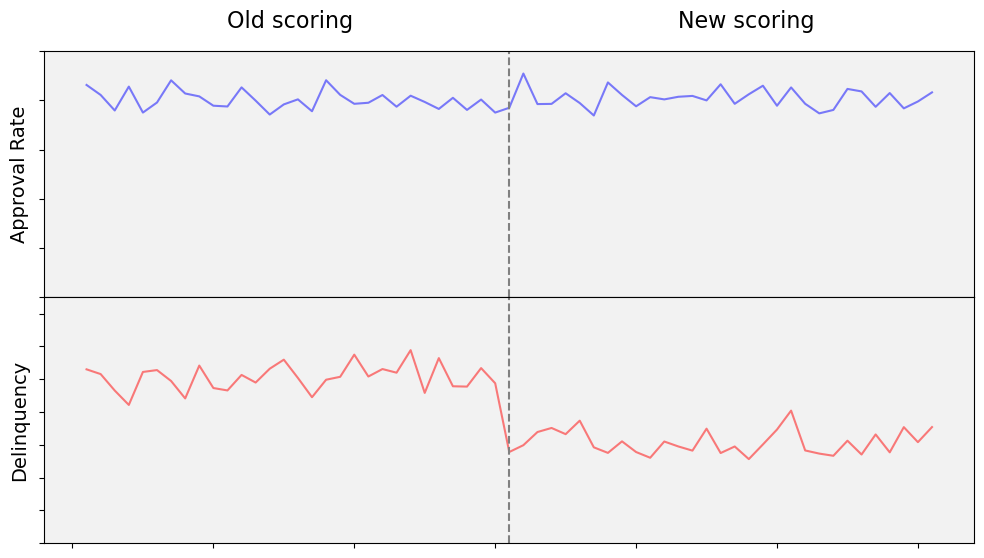

<Figure size 7680x5760 with 0 Axes>

In [408]:
# Data generation
x = np.arange(1, 62)
y1 = np.random.normal(0.4, 0.02, size=61)
y2 = np.random.normal(0.1, 0.009, size=61)
y2[30:] = np.random.normal(0.06, 0.008, size=31)

# Set up figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

# Plot graph 1
plot_on_ax(axs[0], x, y1, 'blue', 'Approval Rate', [0, 0.5])

# Plot graph 2
plot_on_ax(axs[1], x, y2, 'red', 'Delinquency', [0, 0.15])

# Set figure title
fig.suptitle('')
x_pos, y_pos = fig._suptitle.get_position()
fig.text(x_pos - 0.17, y_pos, "Old scoring", ha='center', va='center', fontsize=16)
fig.text(x_pos + 0.21, y_pos, "New scoring", ha='center', va='center', fontsize=16)

plt.subplots_adjust(hspace=0, top=0.93)
plt.figure(dpi=1200)
plt.show()

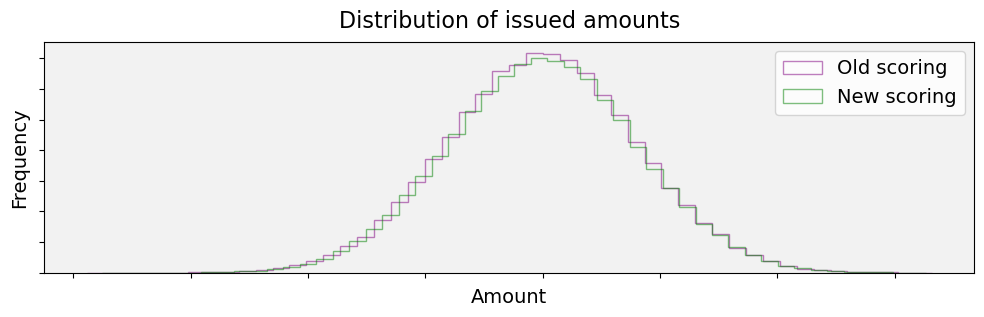

In [409]:
# Data generation
mu, sigma = 100000, 20000
x = mu + sigma * np.random.randn(100000)

mu2, sigma2 = 100000, 20000
y = mu2 + sigma2 * np.random.randn(100000)

# Set up figure
fig, ax = plt.subplots(figsize=(12,3))
ax.set_facecolor((0.95, 0.95, 0.95))

# Plot hists
ax.hist(x, bins=50, alpha=0.5, label='Old scoring', histtype='step', color='purple')
ax.hist(y, bins=50, alpha=0.5, label='New scoring', histtype='step', color='green')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of issued amounts', fontsize=16, pad=10)
plt.legend(fontsize=14)

plt.show()

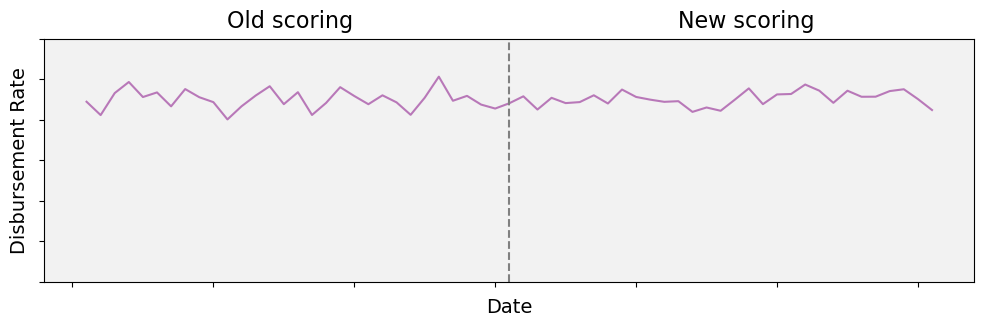

<Figure size 7680x5760 with 0 Axes>

In [410]:
# Data generation
x = np.arange(1, 62)
y = np.random.normal(0.9, 0.04, size=61)

# Set up figure
fig, ax = plt.subplots(figsize=(12,3))

# Plot graph 1
ax.plot(x, y, color='purple', alpha=0.5)
ax.axvline(x=31, linestyle='--', color='gray')
ax.set_ylabel('Disbursement Rate', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim([0, 1.2])
ax.set_facecolor((0.95, 0.95, 0.95))

# Set figure title
fig.suptitle('')
x_pos, y_pos = fig._suptitle.get_position()
fig.text(x_pos - 0.17, y_pos, "Old scoring", ha='center', va='center', fontsize=16)
fig.text(x_pos + 0.21, y_pos, "New scoring", ha='center', va='center', fontsize=16)

plt.subplots_adjust(hspace=0, top=0.92)
plt.figure(dpi=1200)
plt.show()

### Revenue per application


$ Revenue\ per\ Application = {Refunded\ Amount\ -\ Amount\ Issued \over Number\ of\ Applications} $

In [205]:
def revenue_per_application_plot(ax, color):
    if color == 'red':
        xy, xytext = (0.54, 0.3), (0.5, 0.7)
        a = 0.5
    else:
        xy, xytext = (0.54, 0.7), (0.5, 0.3)
        a = 0.4
    ax.annotate("", xy=xy, xytext=xytext,
                arrowprops=dict(facecolor=color, width=8, headwidth=17, alpha=a))
    ax.text(0.75, 0.44, "Revenue per Application", ha='center', va='center', fontsize=14)

def factor_plot(ax, color='red', text='', x=0.21):
    alpha = 0.4 if color == 'green' else 0.5
    ax.annotate("", xy=(0.06, 0.7), xytext=(0.02, 0.3),
                    arrowprops=dict(facecolor=color, width=8, headwidth=17, alpha=alpha))
    ax.text(x, 0.44, text, ha='center', va='center', fontsize=14)

def style_ax(ax):
    ax.set_facecolor((0.95, 0.95, 0.95))
    ax.axvline(x=0.47, linestyle='--', color='gray')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

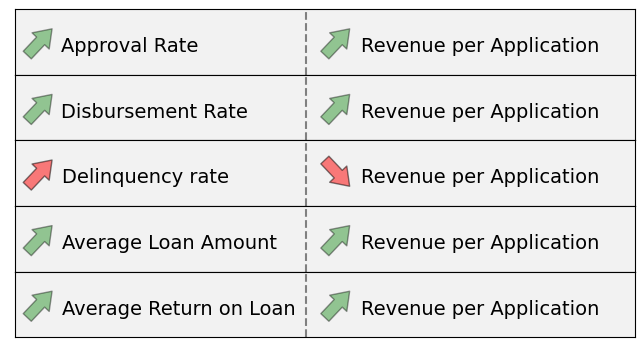

<Figure size 7680x5760 with 0 Axes>

In [206]:
# Set up figure
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8,4))

style_ax(axs[0])
factor_plot(axs[0], color='green', text='Approval Rate', x=0.185)
revenue_per_application_plot(axs[0], color='green')

style_ax(axs[1])
factor_plot(axs[1], color='green', text='Disbursement Rate', x=0.225)
revenue_per_application_plot(axs[1], color='green')

style_ax(axs[2])
factor_plot(axs[2], color='red', text='Delinquency rate', x=0.21)
revenue_per_application_plot(axs[2], color='red')

style_ax(axs[3])
factor_plot(axs[3], color='green', text='Average Loan Amount', x=0.25)
revenue_per_application_plot(axs[3], color='green')

style_ax(axs[4])
factor_plot(axs[4], color='green', text='Average Return on Loan', x=0.265)
revenue_per_application_plot(axs[4], color='green')

plt.subplots_adjust(hspace=0, top=0.93)
plt.figure(dpi=1200)
plt.show()

### Synthetic data generator

In [377]:
@dataclass
class CreditDataGenerator:
    requests_count: int
    date_start: datetime.date
    date_end: datetime.date
    approve_rate: float
    issued_rate: float
    delay_rate: float
    issued_amount_config: dict[int: int]
    collection_rate_good: float
    collection_rate_good_std: float
    collection_rate_bad: float
    collection_rate_bad_std: float
    seed: int

    def __post_init__(self):
        self.generator = np.random.default_rng(self.seed)

    @cached_property
    def get_df(self):
        df = pd.DataFrame(index=self._request_id)
        df['requested_date'] = self._requested_date
        df['is_approved'] = self._is_approved
        df['is_issued'] = self._is_issued
        df['issued_amount'] = self._issued_amount
        df['is_delay'] = self._is_delay
        df['payment_sum'] = np.multiply(self._collection_rate, self._issued_amount)
        df['return_on_loan'] = self._collection_rate
        df['overpay'] = df['payment_sum'] - df['issued_amount']
        return df

    @cached_property
    def _request_id(self):
        return np.arange(0, self.requests_count, 1)

    @cached_property
    def _requested_date(self) -> np.ndarray:
        dates_range = pd.date_range(self.date_start, self.date_end)
        return np.sort(self.generator.choice(dates_range, self.requests_count))

    @cached_property
    def _is_approved(self) -> np.ndarray:
        is_approved = self.generator.random(self.requests_count) < self.approve_rate
        return is_approved.astype('int8')

    @cached_property
    def _is_issued(self) -> np.ndarray:
        is_approved = self._is_approved == 1
        approved_ids = np.where(is_approved)
        approved_count = np.sum(is_approved)

        is_issued = self.generator.random(approved_count) < self.issued_rate
        is_issued = is_issued.astype('int8')

        is_issued_all = np.full(self.requests_count, 0)
        is_issued_all[approved_ids] = is_issued

        return is_issued_all

    @cached_property
    def _issued_amount(self) -> np.ndarray:
        is_issued = self._is_issued == 1
        issued_count = np.sum(is_issued)

        issued_amount_options = []
        for amount, freq in self.issued_amount_config.items():
            issued_amount_options += [amount]*freq

        issued_amount = self.generator.choice(issued_amount_options, issued_count)

        issued_amount_all = np.full(self.requests_count, 0)
        issued_amount_all[is_issued] = issued_amount
        return issued_amount_all

    @cached_property
    def _is_delay(self):
        is_issued = self._is_issued == 1
        issued_count = np.sum(is_issued)

        is_delay = self.generator.random(issued_count) < self.delay_rate
        is_delay = is_delay.astype('int8')

        is_delay_all = np.full(self.requests_count, 0)
        is_delay_all[is_issued] = is_delay
        return is_delay_all

    @cached_property
    def _collection_rate(self):
        is_good = np.logical_and(self._is_delay != 1,  self._is_issued == 1)
        good_count = np.sum(is_good)

        is_bad = np.logical_and(self._is_delay == 1, self._is_issued == 1)
        bad_count = np.sum(is_bad)

        collection_rate_good = np.full(good_count, self.collection_rate_good)
        collection_rate_good += self.generator.normal(0, self.collection_rate_good_std, good_count)
        collection_rate_good = np.where(collection_rate_good < 1, 1, collection_rate_good)

        collection_rate_bad = np.full(bad_count, self.collection_rate_bad)
        collection_rate_bad += self.generator.normal(0, self.collection_rate_bad_std, bad_count)
        collection_rate_bad = np.where(collection_rate_bad < 0, 0, collection_rate_bad)

        collection_rate_all = np.full(self.requests_count, 0.0)
        collection_rate_all[is_good] = collection_rate_good
        collection_rate_all[is_bad] = collection_rate_bad
        return collection_rate_all

### Permutatiuon p-value

In [378]:
def metrics_with_permutation_test(n1, n2, func=np.mean, size=1000, in_pct=True):
    n1_value = func(n1)
    n2_value = func(n2)
    original_diff = n2_value - n1_value
    original_diff_pct = (n2_value / n1_value - 1) * 100
    n = np.concatenate([n1, n2])
    n1_len = len(n1)
    perm_array = np.empty(size)
    for i in range(size):
        ni = np.random.permutation(n)
        n1i = ni[:n1_len]
        n2i = ni[n1_len:]
        perm_array[i] = func(n2i) - func(n1i)
    p_value = np.sum(perm_array>=original_diff) / len(perm_array)
    p_value = (p_value if original_diff > 0 else 1 - p_value) * 100
    if in_pct:
        return n1_value*100, n2_value*100, original_diff_pct, p_value
    return n1_value, n2_value, original_diff_pct, p_value

### Sсoring model vs underwriters comparison

In [379]:
model = CreditDataGenerator(
    requests_count=10_000,
    date_start=datetime.date(2022, 1, 1),
    date_end=datetime.date(2022, 2, 1),
    approve_rate=0.83,
    issued_rate=0.79,
    delay_rate=0.06,
    issued_amount_config={1000: 100, 2000: 200, 3000: 200},
    collection_rate_good=1.2,
    collection_rate_good_std=0.1,
    collection_rate_bad=0.1,
    collection_rate_bad_std=0.3,
    seed=6
).get_df
model['decision'] = 'model'

under = CreditDataGenerator(
    requests_count=10_000,
    date_start=datetime.date(2022, 1, 1),
    date_end=datetime.date(2022, 2, 1),
    approve_rate=0.82,
    issued_rate=0.77,
    delay_rate=0.05,
    issued_amount_config={1000: 100, 2000: 200, 3000: 100},
    collection_rate_good=1.2,
    collection_rate_good_std=0.1,
    collection_rate_bad=0.1,
    collection_rate_bad_std=0.3,
    seed=7
).get_df
under['decision'] = 'under'

In [395]:
def get_series(changes, name):
    return pd.Series(changes, name=name, index=['Manual', 'Model', 'Diff (%)', 'p-value (%)'])

def get_outcomes(under, model):
    pd.set_option('display.precision', 2)
    df = pd.DataFrame()

    df = pd.concat([df, get_series(metrics_with_permutation_test(
        under['is_approved'].values, model['is_approved'].values
    ), 'Approval Rate')], axis=1)

    df = pd.concat([df, get_series(metrics_with_permutation_test(
        under[under.is_approved == 1]['is_issued'].values, model[model.is_approved == 1]['is_issued'].values
    ), 'Disbursement Rate')], axis=1)

    df = pd.concat([df, get_series(metrics_with_permutation_test(
        under[under.is_issued == 1]['is_delay'].values, model[model.is_issued == 1]['is_delay'].values
    ), 'Delinquency rate')], axis=1)

    df = pd.concat([df, get_series(metrics_with_permutation_test(
        under[under.is_issued == 1]['issued_amount'].values, model[model.is_issued == 1]['issued_amount'].values,
        in_pct=False), 'Average Loan Amount')], axis=1)

    df = pd.concat([df, get_series(metrics_with_permutation_test(
        under[under.is_issued == 1]['return_on_loan'].values, model[model.is_issued == 1]['return_on_loan'].values
    ), 'Average Return on Loan')], axis=1)

    return df.T

In [396]:
outcomes = get_outcomes(under, model)
outcomes

,Manual,Model,Diff (%),p-value (%)
Approval Rate,81.59,83.74,2.64,0.0
Disbursement Rate,75.94,79.16,4.24,0.0
Delinquency rate,5.18,6.29,21.42,0.4
Average Loan Amount,2014.04,2205.16,9.49,0.0
Average Return on Loan,114.50,113.88,-0.55,8.5


In [397]:
pd.set_option('display.precision', 2)
df = pd.DataFrame()
df = pd.concat([df, get_series(metrics_with_permutation_test(
    under['overpay'].values, model['overpay'].values, in_pct=False
), 'Revenue per Application')], axis=1)
df.T

,Manual,Model,Diff (%),p-value (%)
Revenue per Application,183.16,202.05,10.31,0.4


In [394]:
pd.concat([outcomes, df.T])

,Manual,Model,Pct diff,p-value
Approval Rate,81.59,83.74,2.64,0.0
Disbursement Rate,75.94,79.16,4.24,0.0
Delinquency rate,5.18,6.29,21.42,0.2
Average Loan Amount,2014.04,2205.16,9.49,0.0
Average Return on Loan,114.50,113.88,-0.55,8.2
Revenue per Application,183.16,202.05,10.31,0.3
